Efficient estimation of bid–ask spreads from open, high, low, and close prices 

https://github.com/eguidotti/bidask

In [2]:
import numpy as np


def edge(open: np.array, high: np.array, low: np.array, close: np.array, sign: bool = False) -> float:
    """
    Efficient Estimation of Bid-Ask Spreads from Open, High, Low, and Close Prices

    Implements an efficient estimator of bid-ask spreads from open, high, low, and close prices 
    as described in Ardia, Guidotti, & Kroencke (2024) -> https://doi.org/10.1016/j.jfineco.2024.103916

    Prices must be sorted in ascending order of the timestamp.

    Parameters
    ----------
    - `open`: array-like vector of open prices
    - `high`: array-like vector of high prices
    - `low`: array-like vector of low prices
    - `close`: array-like vector of close prices
    - `sign`: whether signed estimates should be returned

    Returns
    -------
    The spread estimate. A value of 0.01 corresponds to a spread of 1%.
    
    """

    o = np.log(np.asarray(open))
    h = np.log(np.asarray(high))
    l = np.log(np.asarray(low))
    c = np.log(np.asarray(close))
    m = (h + l) / 2.

    h1, l1, c1, m1 = h[:-1], l[:-1], c[:-1], m[:-1]
    o, h, l, c, m = o[1:], h[1:], l[1:], c[1:], m[1:]

    tau = np.logical_or(h != l, l != c1) 
    phi1 = np.logical_and(o != h, tau)
    phi2 = np.logical_and(o != l, tau)
    phi3 = np.logical_and(c1 != h1, tau)
    phi4 = np.logical_and(c1 != l1, tau)
  
    pt = np.nanmean(tau)
    po = np.nanmean(phi1) + np.nanmean(phi2)
    pc = np.nanmean(phi3) + np.nanmean(phi4)
    
    if pt == 0 or po == 0 or pc == 0:
        return np.nan

    r1 = m-o
    r2 = o-m1
    r3 = m-c1
    r4 = c1-m1
    r5 = o-c1
  
    d1 = r1 - tau * np.nanmean(r1) / pt
    d3 = r3 - tau * np.nanmean(r3) / pt
    d5 = r5 - tau * np.nanmean(r5) / pt
  
    x1 = -4./po*d1*r2 -4./pc*d3*r4 
    x2 = -4./po*d1*r5 -4./pc*d5*r4 
  
    e1 = np.nanmean(x1)
    e2 = np.nanmean(x2)
  
    v1 = np.nanmean(x1**2) - e1**2
    v2 = np.nanmean(x2**2) - e2**2
  
    s2 = (v2*e1 + v1*e2) / (v1 + v2)
  
    s = np.sqrt(np.abs(s2))
    if sign and s2 < 0: 
        s = -s
  
    return float(s)

In [3]:
import pandas as pd

In [6]:
for j in range(12):
    df = pd.read_csv(f'test/price/test_price_1208_21_{j+1}.csv')
    open_np = df['Open'].values
    high_np = df['High'].values
    low_np = df['Low'].values
    close_np = df['Close'].values
    window_size = 60

    bidask_np = np.zeros(len(open_np))

    for i in range(window_size-1, len(open_np)):
        open_window = open_np[i-window_size:i]
        high_window = high_np[i-window_size:i]
        low_window = low_np[i-window_size:i]
        close_window = close_np[i-window_size:i]
        spread = edge(open_window, high_window, low_window, close_window)
        bidask_np[i] = spread
        if i % 100000 == 0:  # 진행 상황 출력
            print(f'{i}: {spread}')

    # bidask_df = pd.DataFrame(bidask_np, columns=['Spread'])
    df['Spread'] = bidask_np

    df.to_csv(f'test/price/test_price_1208_21_{j+1}.csv', index=False)
    

c:\Users\slaye\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\slaye\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:55: RuntimeWarning: Mean of empty slice
  d1 = r1 - tau * np.nanmean(r1) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:56: RuntimeWarning: Mean of empty slice
  d3 = r3 - tau * np.nanmean(r3) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:57: RuntimeWarning: Mean of empty slice
  d5 = r5 - tau * np.nanmean(r5) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:62: RuntimeWarning: Mean of empty slice
  e1 = np.nanmean(x1)
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:63: RuntimeWarning: Mean of empty slice
  e2 = np.nanm

100000: 8.878826227532366e-07
200000: 7.890830757103708e-05
300000: 0.00016573169649749714
400000: 4.228198579833942e-05
500000: 1.98929008505844e-05
600000: 0.00011380881289010063
700000: 9.114670147084483e-05
800000: 2.1857048841888434e-05
900000: 0.00010418888791937295
1000000: 0.00012728828804441016
1100000: 4.277237574571856e-05
1200000: 0.0003733142000830798
1300000: 0.00010844772423570107
1400000: 5.193030309194347e-05
1500000: 3.197064361349655e-05
1600000: 2.951170120850476e-05
1700000: 1.645347959969082e-05
1800000: 9.455219546069487e-05
1900000: 0.00010796283232086134
2000000: 0.00010050206434648153
2100000: 1.3570553312868766e-05
2200000: 6.360018146905987e-05
2300000: 0.00019753287539612215
2400000: 5.319563716368494e-05
2500000: 0.0002072964920290812
2600000: 2.2415907856351288e-05


c:\Users\slaye\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\slaye\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:55: RuntimeWarning: Mean of empty slice
  d1 = r1 - tau * np.nanmean(r1) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:56: RuntimeWarning: Mean of empty slice
  d3 = r3 - tau * np.nanmean(r3) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:57: RuntimeWarning: Mean of empty slice
  d5 = r5 - tau * np.nanmean(r5) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:62: RuntimeWarning: Mean of empty slice
  e1 = np.nanmean(x1)
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:63: RuntimeWarning: Mean of empty slice
  e2 = np.nanm

100000: 5.543528086177487e-05
200000: 2.485046078698872e-05
300000: 2.4820531844091502e-05
400000: 1.9834479536249797e-05
500000: 2.441974444193754e-05
600000: 3.236021703198207e-05
700000: 1.4651844116338633e-05
800000: 2.8938722422711814e-05
900000: 3.782402815276953e-05
1000000: 2.6301863918976716e-05
1100000: 4.4067122236118996e-05
1200000: 2.1297590693568382e-05
1300000: 1.9608366413136902e-05
1400000: 4.242042421936704e-05
1500000: 1.0776379286537024e-05
1600000: 4.0634860775012436e-05
1700000: 5.562383347610636e-05
1800000: 6.41432230066586e-05
1900000: 1.4624668306704659e-05
2000000: 5.8482164704055556e-05
2100000: 4.9600549386050575e-05
2200000: 9.204224187995598e-05
2300000: 3.0460476192973558e-06
2400000: 0.00011331589828448898


c:\Users\slaye\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\slaye\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:55: RuntimeWarning: Mean of empty slice
  d1 = r1 - tau * np.nanmean(r1) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:56: RuntimeWarning: Mean of empty slice
  d3 = r3 - tau * np.nanmean(r3) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:57: RuntimeWarning: Mean of empty slice
  d5 = r5 - tau * np.nanmean(r5) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:62: RuntimeWarning: Mean of empty slice
  e1 = np.nanmean(x1)
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:63: RuntimeWarning: Mean of empty slice
  e2 = np.nanm

100000: 7.029364261983739e-05
200000: 2.7131464025179255e-05
300000: 3.0782397188904844e-05
400000: 4.624421635046872e-05
500000: 4.489776172642028e-05
600000: 1.2549521653880948e-05
700000: 4.1040387513299397e-05
800000: 3.611020639311118e-05
900000: 1.638098219515919e-05
1000000: 4.2852083436854196e-05
1100000: 3.780655680027938e-05
1200000: 5.736941368018155e-05
1300000: 4.7437840219356866e-05
1400000: 3.4664341470708994e-05
1500000: 7.38956697590895e-05
1600000: 3.639460698443082e-05
1700000: 1.5253336733644946e-05
1800000: 4.720904562092855e-05
1900000: 2.8541467212833678e-05
2000000: 1.1199623687712646e-05
2100000: 1.2714570909880506e-05
2200000: 1.4840992893288094e-05
2300000: 5.647290020359569e-05
2400000: 5.380924174918023e-05
2500000: 4.234880428630542e-05
2600000: 3.895228422521557e-05


c:\Users\slaye\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\slaye\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:55: RuntimeWarning: Mean of empty slice
  d1 = r1 - tau * np.nanmean(r1) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:56: RuntimeWarning: Mean of empty slice
  d3 = r3 - tau * np.nanmean(r3) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:57: RuntimeWarning: Mean of empty slice
  d5 = r5 - tau * np.nanmean(r5) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:62: RuntimeWarning: Mean of empty slice
  e1 = np.nanmean(x1)
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:63: RuntimeWarning: Mean of empty slice
  e2 = np.nanm

100000: 3.1186326186589135e-05
200000: 1.4845685687622597e-05
300000: 1.3737991516913213e-05
400000: 2.6141388969388633e-05
500000: 2.031486161636389e-05
600000: 1.7459735364272357e-05
700000: 2.953000071884606e-05
800000: 5.472390944017599e-05
900000: 3.96564810686498e-05
1000000: 4.221315597862838e-05
1100000: 1.2911727659185437e-05
1200000: 3.570019712576904e-05
1300000: 6.99762954960828e-05
1400000: 4.95669234380637e-06
1500000: 8.753513569972549e-06
1600000: 3.211811347726032e-05
1700000: 2.4825152308868866e-06
1800000: 0.0001353011617157352
1900000: 0.00016730712633117607
2000000: 1.0575415827783815e-05
2100000: 7.71039286769321e-06
2200000: 4.2132749501384536e-05
2300000: 3.462453198444141e-05
2400000: 2.4295821408407428e-05
2500000: 2.9770817313721653e-06


c:\Users\slaye\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\slaye\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:55: RuntimeWarning: Mean of empty slice
  d1 = r1 - tau * np.nanmean(r1) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:56: RuntimeWarning: Mean of empty slice
  d3 = r3 - tau * np.nanmean(r3) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:57: RuntimeWarning: Mean of empty slice
  d5 = r5 - tau * np.nanmean(r5) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:62: RuntimeWarning: Mean of empty slice
  e1 = np.nanmean(x1)
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:63: RuntimeWarning: Mean of empty slice
  e2 = np.nanm

100000: 4.392184486585889e-05
200000: 7.492138658579725e-05
300000: 3.8526443795850814e-05
400000: 5.341903394393806e-05
500000: 2.463308424265438e-05
600000: 7.559730618906065e-05
700000: 5.463547354396945e-05
800000: 1.1881329978568699e-05
900000: 6.932138371879171e-05
1000000: 5.6527364542937364e-05
1100000: 0.0002268308669261858
1200000: 0.00011839754931532532
1300000: 6.843473842068765e-05
1400000: 2.8823421260442953e-05
1500000: 1.1270014787051053e-05
1600000: 0.00013659062900094537
1700000: 0.00016222794853041733
1800000: 0.00015398972722776856
1900000: 5.006538662724222e-05
2000000: 3.791045738102142e-05
2100000: 1.836985347674388e-05
2200000: 4.5039914863777244e-05
2300000: 4.3433234275060725e-05
2400000: 9.306934443775608e-05
2500000: 5.5260579751628e-05
2600000: 3.493780604125558e-05


c:\Users\slaye\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\slaye\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:55: RuntimeWarning: Mean of empty slice
  d1 = r1 - tau * np.nanmean(r1) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:56: RuntimeWarning: Mean of empty slice
  d3 = r3 - tau * np.nanmean(r3) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:57: RuntimeWarning: Mean of empty slice
  d5 = r5 - tau * np.nanmean(r5) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:62: RuntimeWarning: Mean of empty slice
  e1 = np.nanmean(x1)
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:63: RuntimeWarning: Mean of empty slice
  e2 = np.nanm

100000: 2.9504926186276945e-05
200000: 1.183014103629977e-05
300000: 2.3299423904432798e-05
400000: 4.978034279988454e-05
500000: 8.88357914943537e-06
600000: 4.77284839199438e-06
700000: 7.782088041168019e-05
800000: 4.076480909227051e-05
900000: 3.344069459740676e-05
1000000: 1.3050384666333202e-05
1100000: 1.0333281357091628e-05
1200000: 4.760140953112433e-05
1300000: 3.332911925029522e-05
1400000: 3.2649629172394345e-05
1500000: 1.2245679993362644e-05
1600000: 4.330884172928695e-05
1700000: 7.622486093434951e-06
1800000: 6.550203147706386e-05
1900000: 5.568145738855204e-05
2000000: 4.762849995668027e-05
2100000: 2.516480659595879e-05
2200000: 0.00011719428622109769
2300000: 6.222739766911686e-05
2400000: 2.254283746189503e-05
2500000: 9.701717753015308e-05


c:\Users\slaye\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\slaye\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:55: RuntimeWarning: Mean of empty slice
  d1 = r1 - tau * np.nanmean(r1) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:56: RuntimeWarning: Mean of empty slice
  d3 = r3 - tau * np.nanmean(r3) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:57: RuntimeWarning: Mean of empty slice
  d5 = r5 - tau * np.nanmean(r5) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:62: RuntimeWarning: Mean of empty slice
  e1 = np.nanmean(x1)
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:63: RuntimeWarning: Mean of empty slice
  e2 = np.nanm

100000: 9.49461548173425e-05
200000: 0.00013921284641407427
300000: 2.4489197447084147e-05
400000: 3.6345577016522784e-05
500000: 2.0434496809077663e-05
600000: 5.7455487330103346e-05
700000: 2.589944753246868e-05
800000: 0.00010488583345492626
900000: 2.7788181424440228e-05
1000000: 1.6696648287484656e-05
1100000: 1.79523794128674e-05
1200000: 7.089396755904756e-05
1300000: 1.8742461898331196e-05
1400000: 5.748394919933587e-05
1500000: 2.2641111956219234e-05
1600000: 4.031831311677069e-05
1700000: 7.758984698354133e-05
1800000: 6.324147708322464e-05
1900000: 2.4096858321237694e-05
2000000: 2.967503884033286e-05
2100000: 2.9544718325237248e-05
2200000: 1.820514529154289e-05
2300000: 4.78290786896511e-05
2400000: 3.105196323206939e-05
2500000: 6.932983551841474e-06
2600000: 1.7016334555487914e-06


c:\Users\slaye\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\slaye\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:55: RuntimeWarning: Mean of empty slice
  d1 = r1 - tau * np.nanmean(r1) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:56: RuntimeWarning: Mean of empty slice
  d3 = r3 - tau * np.nanmean(r3) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:57: RuntimeWarning: Mean of empty slice
  d5 = r5 - tau * np.nanmean(r5) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:62: RuntimeWarning: Mean of empty slice
  e1 = np.nanmean(x1)
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:63: RuntimeWarning: Mean of empty slice
  e2 = np.nanm

100000: 2.2313209738636372e-05
200000: 4.882525833657643e-05
300000: 4.0304773222236766e-05
400000: 7.198429913091861e-05
500000: 3.564771858720812e-05
600000: 4.3412135401107864e-06
700000: 2.0368416319607652e-05
800000: 1.6663344130140453e-05
900000: 1.537485759044996e-05
1000000: 3.2572572739557074e-05
1100000: 5.0594270963286704e-05
1200000: 4.796566868407923e-05
1300000: 1.2388522089432278e-05
1400000: 1.1664977934108756e-05
1500000: 2.1475844857103473e-05
1600000: 3.080360740144921e-05
1700000: 1.97559138403064e-05
1800000: 2.2443680147376393e-05
1900000: 2.820978749836457e-05
2000000: 7.4310776520630495e-06
2100000: 1.2685132489736665e-05
2200000: 5.975354373246256e-05
2300000: 2.51884091223239e-05
2400000: 4.205441163356186e-05
2500000: 3.4669489026626434e-05
2600000: 1.4606950394588107e-05


c:\Users\slaye\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\slaye\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:55: RuntimeWarning: Mean of empty slice
  d1 = r1 - tau * np.nanmean(r1) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:56: RuntimeWarning: Mean of empty slice
  d3 = r3 - tau * np.nanmean(r3) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:57: RuntimeWarning: Mean of empty slice
  d5 = r5 - tau * np.nanmean(r5) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:62: RuntimeWarning: Mean of empty slice
  e1 = np.nanmean(x1)
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:63: RuntimeWarning: Mean of empty slice
  e2 = np.nanm

100000: 1.6563231337675335e-05
200000: 2.1657536238772024e-05
300000: 7.502256151036423e-06
400000: 2.1299963411586185e-05
500000: 2.5126422944226245e-05
600000: 3.9996909514518056e-05
700000: 1.9764767929347013e-05
800000: 3.6787137348083514e-05
900000: 2.259180260820666e-05
1000000: 1.2512926307346511e-05
1100000: 2.1560740275134487e-05
1200000: 2.7364160403982093e-05
1300000: 2.1691918631905092e-05
1400000: 7.423921522849752e-06
1500000: 1.5634228047991674e-05
1600000: 3.174082466295197e-05
1700000: 1.8342572705962554e-05
1800000: 6.194126190935985e-05
1900000: 2.3614829082822017e-05
2000000: 7.713782825877072e-07
2100000: 3.3138028567590764e-05
2200000: 2.5112992338760707e-05
2300000: 4.142027700911713e-05
2400000: 1.5764718623207016e-05
2500000: 1.3733652481408259e-05


c:\Users\slaye\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\slaye\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:55: RuntimeWarning: Mean of empty slice
  d1 = r1 - tau * np.nanmean(r1) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:56: RuntimeWarning: Mean of empty slice
  d3 = r3 - tau * np.nanmean(r3) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:57: RuntimeWarning: Mean of empty slice
  d5 = r5 - tau * np.nanmean(r5) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:62: RuntimeWarning: Mean of empty slice
  e1 = np.nanmean(x1)
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:63: RuntimeWarning: Mean of empty slice
  e2 = np.nanm

100000: 1.0953351468490405e-05
200000: 7.635604680458393e-06
300000: 1.5711054236905866e-05
400000: 1.3185184496999343e-05
500000: 7.982069235627949e-05
600000: 2.2002479955345575e-05
700000: 9.901261317548303e-06
800000: 1.1656527599286003e-05
900000: 1.0062027770481327e-05
1000000: 4.7969344170851664e-05
1100000: 9.560903308443364e-05
1200000: 4.377013910637841e-05
1300000: 1.9927559891034252e-05
1400000: 1.79282656846923e-05
1500000: 8.63807140799574e-06
1600000: 2.137016416571813e-06
1700000: 4.17275912735891e-05
1800000: 0.00010304520336936039
1900000: 6.4259578433755884e-06
2000000: 2.2155591965872128e-05
2100000: 2.3196493568492825e-05
2200000: 1.6050324355399592e-05
2300000: 9.854880707333956e-06
2400000: 0.001371143705603744
2500000: 2.9818639126347273e-05
2600000: 1.4328707453093478e-05


c:\Users\slaye\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\slaye\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:55: RuntimeWarning: Mean of empty slice
  d1 = r1 - tau * np.nanmean(r1) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:56: RuntimeWarning: Mean of empty slice
  d3 = r3 - tau * np.nanmean(r3) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:57: RuntimeWarning: Mean of empty slice
  d5 = r5 - tau * np.nanmean(r5) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:62: RuntimeWarning: Mean of empty slice
  e1 = np.nanmean(x1)
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:63: RuntimeWarning: Mean of empty slice
  e2 = np.nanm

100000: 1.7999789548337834e-05
200000: 5.006060827153302e-07
300000: 2.3622187028058488e-05
400000: 5.43167135641138e-05
500000: 1.0466438107794037e-05
600000: 1.0641823665412024e-05
700000: 3.485538476090897e-05
800000: 2.8861291917306402e-05
900000: 1.642503026295997e-05
1000000: 1.943930605365908e-05
1100000: 2.0232364922966975e-05
1200000: 2.608259645109558e-05
1300000: 0.00023317118704249074
1400000: 2.151405713971872e-05
1500000: 2.434506326743467e-05
1600000: 9.66347425319887e-05
1700000: 1.1864931453487419e-05
1800000: 1.0678511694862893e-05
1900000: 3.0291469924272436e-05
2000000: 7.145597420528955e-06
2100000: 1.9439017381880204e-05
2200000: 4.820918465288429e-05
2300000: 1.1678126277527498e-05
2400000: 2.0515205104682756e-05
2500000: 3.8738837064763994e-05


c:\Users\slaye\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\slaye\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:55: RuntimeWarning: Mean of empty slice
  d1 = r1 - tau * np.nanmean(r1) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:56: RuntimeWarning: Mean of empty slice
  d3 = r3 - tau * np.nanmean(r3) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:57: RuntimeWarning: Mean of empty slice
  d5 = r5 - tau * np.nanmean(r5) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:62: RuntimeWarning: Mean of empty slice
  e1 = np.nanmean(x1)
C:\Users\slaye\AppData\Local\Temp\ipykernel_45800\3588741314.py:63: RuntimeWarning: Mean of empty slice
  e2 = np.nanm

100000: 7.516579244337415e-06
200000: 3.8442699748962694e-05
300000: 4.9601316775874014e-05
400000: 5.424199079504006e-05
500000: 1.5472316662015827e-05
600000: 7.349888347631586e-05
700000: 6.104875271131727e-05
800000: 8.299880937023212e-06
900000: 2.041705877239082e-05
1000000: 2.1264576369234476e-05
1100000: 7.380298923732344e-05
1200000: 1.2278871371421822e-05
1300000: 3.058556655907448e-05
1400000: 3.066386373533153e-05
1500000: 6.559660620754845e-06
1600000: 1.9277471362874373e-05
1700000: 6.007224864130427e-05
1800000: 1.546916534415136e-05
1900000: 5.3449235677694926e-05
2000000: 4.764276242328117e-06
2100000: 9.746692269212731e-06
2200000: 3.011108197356934e-05
2300000: 2.3401125150584942e-05
2400000: 1.838596973201346e-05
2500000: 1.016433338291348e-05
2600000: 1.398056963151932e-05


c:\Users\slaye\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\slaye\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\slaye\AppData\Local\Temp\ipykernel_34720\3588741314.py:55: RuntimeWarning: Mean of empty slice
  d1 = r1 - tau * np.nanmean(r1) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_34720\3588741314.py:56: RuntimeWarning: Mean of empty slice
  d3 = r3 - tau * np.nanmean(r3) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_34720\3588741314.py:57: RuntimeWarning: Mean of empty slice
  d5 = r5 - tau * np.nanmean(r5) / pt
C:\Users\slaye\AppData\Local\Temp\ipykernel_34720\3588741314.py:62: RuntimeWarning: Mean of empty slice
  e1 = np.nanmean(x1)
C:\Users\slaye\AppData\Local\Temp\ipykernel_34720\3588741314.py:63: RuntimeWarning: Mean of empty slice
  e2 = np.nanm

100000: 1.0953351468490405e-05
200000: 7.635604680458393e-06
300000: 1.5711054236905866e-05
400000: 1.3185184496999343e-05
500000: 7.982069235627949e-05
600000: 2.2002479955345575e-05
700000: 9.901261317548303e-06
800000: 1.1656527599286003e-05
900000: 1.0062027770481327e-05
1000000: 4.7969344170851664e-05
1100000: 9.560903308443364e-05
1200000: 4.377013910637841e-05
1300000: 1.9927559891034252e-05
1400000: 1.79282656846923e-05
1500000: 8.63807140799574e-06
1600000: 2.137016416571813e-06
1700000: 4.17275912735891e-05
1800000: 0.00010304520336936039
1900000: 6.4259578433755884e-06
2000000: 2.2155591965872128e-05
2100000: 2.3196493568492825e-05
2200000: 1.6050324355399592e-05
2300000: 9.854880707333956e-06
2400000: 0.001371143705603744
2500000: 2.9818639126347273e-05
2600000: 1.4328707453093478e-05


In [15]:
df.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,Spread
0,1633046400000,43820.01,43820.01,43814.86,43820.01,1.11549,1633046400999,48877.988373,18,0.25020,10963.766502,0,0.0
1,1633046401000,43820.01,43820.01,43820.00,43820.00,0.08210,1633046401999,3597.622722,6,0.07219,3163.366522,0,0.0
2,1633046402000,43820.01,43820.01,43820.00,43820.00,0.60598,1633046402999,26554.049502,12,0.59024,25864.322702,0,0.0
3,1633046403000,43820.01,43820.01,43820.00,43820.01,0.09518,1633046403999,4170.788507,14,0.09068,3973.598507,0,0.0
4,1633046404000,43820.00,43820.00,43816.22,43816.22,0.85701,1633046404999,37553.312524,27,0.13199,5783.743454,0,0.0


<Axes: >

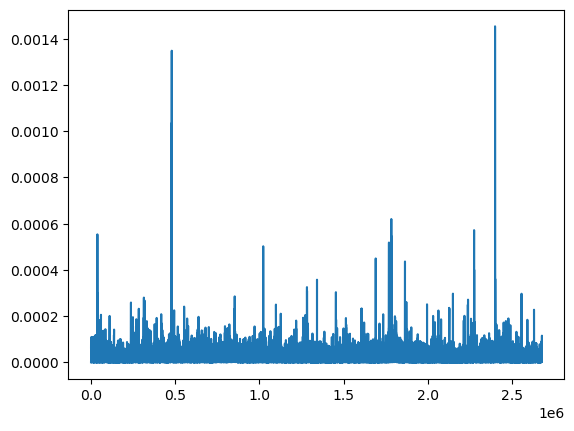

In [19]:
df.Spread.plot()